In [1]:
# change dir to root
import os
import sys
from utils.classes import TennisMatchDataset
import numpy as np
import pandas as pd
import json
import os 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, TensorDataset
import torch.optim as optim
from tqdm.notebook import tqdm
import torch 
from torch.utils.data import random_split
import utils.constants as c
import data.utils.constants as c2
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

MAX_PADDED = 30


In [2]:


tennis_dataset = TennisMatchDataset([   
                                        'past-french-open-atp-singles', 
                                        'past-australian-open-atp-singles',
                                        'past-rome-atp-singles', 
                                        'past-madrid-atp-singles',
                                        'past-monte-carlo-atp-singles',
                                        'past-lyon-atp-singles',
                                        'past-barcelona-atp-singles',
                                        'past-munich-atp-singles',
                                        'past-geneva-atp-singles',
                                        'past-estoril-atp-singles',
                                        'past-houston-atp-singles',
                                        'past-marrakech-atp-singles',
                                        'past-bucharest-atp-singles',
                                        'past-doha-atp-singles',
                                        'past-dubai-atp-singles',
                                        'past-indian-wells-atp-singles',
                                        'past-miami-atp-singles',
                                        'past-acapulco-atp-singles',
                                        'past-rio-de-janeiro-atp-singles',
                                        'past-santiago-atp-singles',
                                        'past-brisbane-atp-singles',
                                        'past-hong-kong-atp-singles',
                                        'past-auckland-atp-singles',
                                        'past-adelaide-atp-singles',
                                        'past-montpellier-atp-singles',
                                        'past-marseille-atp-singles',
                                        'past-cordoba-atp-singles',
                                        'past-dallas-atp-singles',
                                        'past-french-open-2023-atp-singles',
                                        'past-australian-open-2023-atp-singles',
                                        'past-rome-2023-atp-singles',
                                        'past-madrid-2023-atp-singles',
                                        'past-monte-carlo-2023-atp-singles',
                                        'past-lyon-2023-atp-singles',
                                        'past-barcelona-2023-atp-singles',
                                        'past-munich-2023-atp-singles',
                                        'past-geneva-2023-atp-singles',
                                        'past-estoril-2023-atp-singles',
                                        'past-houston-2023-atp-singles',
                                        'past-marrakech-2023-atp-singles', 
                                        'past-doha-2023-atp-singles',
                                        'past-dubai-2023-atp-singles',
                                        'past-indian-wells-2023-atp-singles',
                                        'past-miami-2023-atp-singles',
                                        'past-acapulco-2023-atp-singles',
                                        'past-rio-de-janeiro-2023-atp-singles',
                                        'past-santiago-2023-atp-singles',
                                        'past-auckland-2023-atp-singles',
                                        'past-adelaide-2023-atp-singles',
                                        'past-montpellier-2023-atp-singles',
                                        'past-marseille-2023-atp-singles',
                                        'past-cordoba-2023-atp-singles',
                                        'past-dallas-2023-atp-singles',
                                        'past-stuttgart-2023-atp-singles',
                                        'past-hertogenbosch-2023-atp-singles',
                                        'past-halle-2023-atp-singles',
                                        'past-london-2023-atp-singles',
                                        'past-mallorca-2023-atp-singles',
                                        'past-eastbourne-2023-atp-singles',
                                        'past-wimbledon-2023-atp-singles',
                                        # 'past-hamburg-2023-atp-singles',
                                        #   'past-bastad-2023-atp-singles',
                                        #   'past-gstaad-2023-atp-singles', ###
                                        #   'past-newport-2023-atp-singles',
                                        #   'past-umag-2023-atp-singles',
                                        #   'past-atlanta-2023-atp-singles',
                                        #   'past-washington-2023-atp-singles',
                                        #   # 'past-montreal-2023-atp-singles', ###
                                        #   'past-cincinnati-2023-atp-singles',
                                        #   'past-winston-salem-2023-atp-singles',
                                        #   'past-us-open-2023-atp-singles', ###
                                        #   'past-chengdu-2023-atp-singles',
                                        #   'past-zhuhai-2023-atp-singles', ###
                                        #   'past-tokyo-2023-atp-singles',
                                        #   'past-beijing-2023-atp-singles', ###
                                        #   'past-shanghai-2023-atp-singles',
                                        #   'past-stockholm-2023-atp-singles',
                                        #   'past-antwerp-2023-atp-singles', ###
                                        #   # 'past-almaty-2023-atp-singles', ###
                                        #   'past-vienna-2023-atp-singles',
                                        #   'past-basel-2023-atp-singles',
                                        #   'past-paris-2023-atp-singles',
                                        #   'past-metz-2023-atp-singles',
                                        #   'past-finals-turin-2023-atp-singles',
                                     ])

Loading data for tournaments {'past-hertogenbosch-2023-atp-singles', 'past-santiago-2023-atp-singles', 'past-madrid-2023-atp-singles', 'past-rio-de-janeiro-2023-atp-singles', 'past-marrakech-2023-atp-singles', 'past-estoril-2023-atp-singles', 'past-munich-2023-atp-singles', 'past-marseille-2023-atp-singles', 'past-halle-2023-atp-singles', 'past-wimbledon-2023-atp-singles', 'past-mallorca-2023-atp-singles', 'past-lyon-2023-atp-singles', 'past-australian-open-2023-atp-singles', 'past-munich-atp-singles', 'past-brisbane-atp-singles', 'past-geneva-2023-atp-singles', 'past-marseille-atp-singles', 'past-french-open-atp-singles', 'past-indian-wells-2023-atp-singles', 'past-miami-atp-singles', 'past-bucharest-atp-singles', 'past-hong-kong-atp-singles', 'past-monte-carlo-2023-atp-singles', 'past-dallas-atp-singles', 'past-geneva-atp-singles', 'past-acapulco-atp-singles', 'past-stuttgart-2023-atp-singles', 'past-eastbourne-2023-atp-singles', 'past-acapulco-2023-atp-singles', 'past-doha-atp-singl

In [3]:
# nb_errors = 0
# list_vectors = []
# list_labels = []
# for match_id in tqdm(tennis_dataset.get_matches_ids()):
#     nb_try = 0
#     while nb_try < 3:
#         try :
#             vector = tennis_dataset.get_match(match_id).get_feature_vector()
#             list_vectors.append(vector)
#             label = tennis_dataset.get_match(match_id).get_label()
#             list_labels.append(label)
#             break
#         except Exception as e:
#             nb_try += 1
#             if nb_try == 3 :
#                 tqdm.write(f"error : {e} for match_id : {match_id} opposing {tennis_dataset.get_match(match_id).get_players()[0]} to {tennis_dataset.get_match(match_id).get_players()[1]}")
#                 nb_errors += 1
    
    
# tqdm.write(f'Number of errors : {nb_errors} over {len(tennis_dataset.get_matches_ids())} matches')
list_vectors, list_labels, lst_match_id, nb_errors = tennis_dataset.get_past_vectors()

tqdm.write(f'Number of errors : {nb_errors}')


  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Error 'g0a0' for match AVoR4TAs in tournament past-hertogenbosch-2023-atp-singles
Error 'g0a0' for match dOHN0qx9 in tournament past-hertogenbosch-2023-atp-singles
Error 'ld26' for match 0K0fBYfH in tournament past-hertogenbosch-2023-atp-singles
Error 'c0jt' for match xhjypiPk in tournament past-hertogenbosch-2023-atp-singles
Error 'ld26' for match QDWV5Yo9 in tournament past-hertogenbosch-2023-atp-singles
Error 'dc83' for match KGutqBvd in tournament past-hertogenbosch-2023-atp-singles
Error 'd0d2' for match nNXR6EW2 in tournament past-hertogenbosch-2023-atp-singles
Error 'l0fv' for match nolBXzFh in tournament past-hertogenbosch-2023-atp-singles
Error 'j0dg' for match 2XlocLv9 in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match xdWNSUb1 in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match z9esrzdS in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match WMPRVeL2 in tournament past-santiago-2023-atp-singles


  5%|▌         | 3/60 [00:00<00:03, 16.37it/s]

Error 'lb07' for match IwSwTg5L in tournament past-santiago-2023-atp-singles
Error 'kb05' for match 2FDcZwyg in tournament past-madrid-2023-atp-singles
Error 'g0a0' for match lWaJUFkO in tournament past-madrid-2023-atp-singles
Error 'ca12' for match trhqK7Vl in tournament past-madrid-2023-atp-singles
Error 'j0dg' for match AmsXXVl3 in tournament past-madrid-2023-atp-singles
Error 'c882' for match WzefEQp8 in tournament past-madrid-2023-atp-singles
Error 'ch90' for match jJrmkYDO in tournament past-madrid-2023-atp-singles
Error 'bd80' for match OAVG07G8 in tournament past-madrid-2023-atp-singles
Error 'v09t' for match t60fPLDt in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match beWL18hb in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match 6irdkFW9 in tournament past-rio-de-janeiro-2023-atp-singles
Error 'r09v' for match MPFbjYNf in tournament past-rio-de-janeiro-2023-atp-singles
Error 'r09v' for match Yqg39oAs in tournament past-rio-de-janeiro-

  5%|▌         | 3/60 [00:00<00:03, 16.37it/s]

Error 'mp94' for match CfGRKpug in tournament past-marrakech-2023-atp-singles
Error 'l0ck' for match YNq1gu5J in tournament past-marrakech-2023-atp-singles
Error 'bt68' for match IeLXmJSt in tournament past-marrakech-2023-atp-singles
Error 'a0ey' for match U13pNgIm in tournament past-marrakech-2023-atp-singles
Error 'p0j3' for match bse1JBHC in tournament past-marrakech-2023-atp-singles
Error 'c882' for match GfN9TeuK in tournament past-marrakech-2023-atp-singles
Error 's483' for match MVj0W5n6 in tournament past-estoril-2023-atp-singles
Error 'ch90' for match zZdiOYmk in tournament past-estoril-2023-atp-singles


 13%|█▎        | 8/60 [00:00<00:01, 30.32it/s]

Error 's483' for match 0dIpBJlC in tournament past-estoril-2023-atp-singles
Error 's483' for match 4ISXadem in tournament past-estoril-2023-atp-singles
Error 'c0jt' for match YquGsFuJ in tournament past-estoril-2023-atp-singles
Error 'g0a0' for match UiS7Xxpk in tournament past-munich-2023-atp-singles
Error 'g0a0' for match S6xwZJI1 in tournament past-munich-2023-atp-singles
Error 'r685' for match v1Y45eKU in tournament past-munich-2023-atp-singles
Error 'lf29' for match h8lL7o1b in tournament past-munich-2023-atp-singles
Error 'f0ff' for match 6in9AmHu in tournament past-munich-2023-atp-singles
Error 'c0jt' for match 6ZKc7HkI in tournament past-munich-2023-atp-singles
Error 'c882' for match 8Ucheze1 in tournament past-marseille-2023-atp-singles
Error 'g0a0' for match z7UCUcN1 in tournament past-marseille-2023-atp-singles
Error 'kb05' for match EcTGTHx8 in tournament past-marseille-2023-atp-singles
Error 'g0a0' for match McyRP3w4 in tournament past-wimbledon-2023-atp-singles
Error 'l0c

 13%|█▎        | 8/60 [00:00<00:01, 30.32it/s]

Error 'pd07' for match bavrQv59 in tournament past-wimbledon-2023-atp-singles
Error 'w0ah' for match bZjQtOoI in tournament past-wimbledon-2023-atp-singles
Error 'l949' for match WphAFomJ in tournament past-wimbledon-2023-atp-singles
Error 'p0gq' for match hfg6GRXC in tournament past-wimbledon-2023-atp-singles
Error 'd0c3' for match f164fsGH in tournament past-wimbledon-2023-atp-singles
Error 'l397' for match d24T6JUH in tournament past-mallorca-2023-atp-singles
Error 'l397' for match YiNcHJVK in tournament past-mallorca-2023-atp-singles
Error 'l397' for match nP6SGOQM in tournament past-mallorca-2023-atp-singles


 20%|██        | 12/60 [00:00<00:01, 26.15it/s]

Error 'v306' for match ripAUDVn in tournament past-mallorca-2023-atp-singles
Error 'lf29' for match OG8zcwph in tournament past-lyon-2023-atp-singles
Error 'lf29' for match dKVJr8VI in tournament past-lyon-2023-atp-singles
Error 'lf29' for match ADUBY9So in tournament past-lyon-2023-atp-singles
Error 'b0lx' for match SxwKqO2c in tournament past-australian-open-2023-atp-singles
Error 'cd85' for match 0v1XTN0D in tournament past-australian-open-2023-atp-singles
Error 'b0lx' for match lEhbNBU5 in tournament past-australian-open-2023-atp-singles
Error 'ca12' for match Mm2TU3o7 in tournament past-australian-open-2023-atp-singles
Error 'mh30' for match 4IjcXngU in tournament past-australian-open-2023-atp-singles
Error 'ch90' for match jVvR1pD9 in tournament past-australian-open-2023-atp-singles
Error 'b0lx' for match zeMB9YAm in tournament past-australian-open-2023-atp-singles
Error 'kb05' for match WKOimobG in tournament past-australian-open-2023-atp-singles
Error 'cd85' for match 4YMaoPSS 

 25%|██▌       | 15/60 [00:00<00:02, 22.45it/s]

Error 'kb54' for match beGbbuUM in tournament past-brisbane-atp-singles
Error 'b0ot' for match GWnPE0E3 in tournament past-brisbane-atp-singles


 30%|███       | 18/60 [00:00<00:01, 21.80it/s]

Error 'g0a0' for match dxBefWX7 in tournament past-geneva-2023-atp-singles
Error 'kb05' for match S05K2fQR in tournament past-geneva-2023-atp-singles
Error 'e811' for match b1cwkjEI in tournament past-geneva-2023-atp-singles
Error 'v306' for match Gx8YkWbC in tournament past-geneva-2023-atp-singles
Error 'm0c2' for match Ea8H7vIs in tournament past-marseille-atp-singles
Error 'm0c2' for match E5731zbh in tournament past-marseille-atp-singles
Error 'cd85' for match SM4YT5as in tournament past-french-open-atp-singles
Error 'm0tb' for match p2JTgv1D in tournament past-french-open-atp-singles
Error 'j0dg' for match 4tJwZg1k in tournament past-french-open-atp-singles
Error 'kb05' for match dp3msuhI in tournament past-french-open-atp-singles
Error 'm0tu' for match MkH6A105 in tournament past-french-open-atp-singles
Error 'f0ho' for match K0mZFWeR in tournament past-french-open-atp-singles
Error 'g0a0' for match ShNOapnm in tournament past-french-open-atp-singles
Error 'p0k5' for match SO3p61

 30%|███       | 18/60 [00:00<00:01, 21.80it/s]

Error 'c882' for match dfxBcO2b in tournament past-indian-wells-2023-atp-singles
Error 'b0oy' for match MRvrzfVn in tournament past-indian-wells-2023-atp-singles
Error 'c882' for match nk6BRFdC in tournament past-indian-wells-2023-atp-singles
Error 'ga36' for match KxFfVccm in tournament past-indian-wells-2023-atp-singles
Error 'b0oy' for match Kv6WQr61 in tournament past-indian-wells-2023-atp-singles


 35%|███▌      | 21/60 [00:01<00:01, 21.34it/s]

Error 'ka98' for match YsAzQ2L7 in tournament past-indian-wells-2023-atp-singles
Error 'm0c2' for match ELRtTeAj in tournament past-miami-atp-singles
Error 'm0c2' for match ELwp144T in tournament past-miami-atp-singles
Error 'm0c2' for match AmHMYpQ3 in tournament past-miami-atp-singles
Error 'b0no' for match O8W0ZHGE in tournament past-miami-atp-singles
Error 's0ja' for match GpzmREzh in tournament past-miami-atp-singles
Error 's0uv' for match A9CnbG65 in tournament past-miami-atp-singles
Error 'pl80' for match 6VCWfDCi in tournament past-bucharest-atp-singles
Error 'g0a0' for match lCcEjXsC in tournament past-hong-kong-atp-singles
Error 'g0a0' for match bmpdQ982 in tournament past-hong-kong-atp-singles
Error 'c977' for match Uk3rI2IB in tournament past-hong-kong-atp-singles
Error 'g0a0' for match bPPFCHst in tournament past-hong-kong-atp-singles
Error 'd0jw' for match tCHdQ34e in tournament past-hong-kong-atp-singles
Error 'f0bn' for match rRbgRqkk in tournament past-hong-kong-atp-si

 43%|████▎     | 26/60 [00:01<00:01, 27.34it/s]

Error 'rh88' for match foC1GUZO in tournament past-acapulco-atp-singles


Error 'l397' for match dvrgn9ye in tournament past-stuttgart-2023-atp-singles
Error 'o659' for match fBkyM5g4 in tournament past-stuttgart-2023-atp-singles
Error 'g0a0' for match 4lVKIbiM in tournament past-eastbourne-2023-atp-singles
Error 'g0a0' for match xhSj0euA in tournament past-eastbourne-2023-atp-singles
Error 'l0cf' for match WERfaFfG in tournament past-eastbourne-2023-atp-singles
Error 'g0a0' for match bD3ZIio9 in tournament past-eastbourne-2023-atp-singles
Error 'l0ee' for match rBjlQXzO in tournament past-eastbourne-2023-atp-singles
Error 'g0a0' for match hMcyTZj5 in tournament past-eastbourne-2023-atp-singles
Error 'j0dg' for match Me2uSg6B in tournament past-eastbourne-2023-atp-singles
Error 'l397' for match hSIM2woc in tournament past-acapulco-2023-atp-singles
Error 'ga36' for match WhYr5FG7 in tournament past-acapulco-2023-atp-singles
Error 'l397' for match KEEwRdwR in tournament past-acapulco-2023-atp-singles
Error 'sf89' for match fN3Y1Wio in tournament past-acapulco-

Error 'b0lx' for match 4hBAhYri in tournament past-auckland-2023-atp-singles
Error 'b0lx' for match tnMsO9Gg in tournament past-auckland-2023-atp-singles
Error 'b0lx' for match KzOtBzYq in tournament past-auckland-2023-atp-singles
Error 'r0dc' for match EgJpyv5l in tournament past-auckland-2023-atp-singles
Error 'r0dc' for match b9kUGqIT in tournament past-auckland-2023-atp-singles
Error 'p0j3' for match ELPwym3o in tournament past-auckland-2023-atp-singles


 57%|█████▋    | 34/60 [00:01<00:00, 26.35it/s]

Error 'ch90' for match d4HfX42A in tournament past-auckland-2023-atp-singles
Error 'r0cg' for match AmJnZQXc in tournament past-auckland-2023-atp-singles
Error 'c977' for match prLzS6cc in tournament past-australian-open-atp-singles
Error 'mh30' for match zu4mFqQS in tournament past-australian-open-atp-singles
Error 'g0a0' for match KrMuGvTC in tournament past-australian-open-atp-singles
Error 'w0c4' for match C0eFA3Yq in tournament past-australian-open-atp-singles
Error 'g0a0' for match 8ld0Azzr in tournament past-australian-open-atp-singles
Error 'kc29' for match IqDiVGfA in tournament past-australian-open-atp-singles
Error 'w0c4' for match Sh9PXUX5 in tournament past-australian-open-atp-singles
Error 'mh30' for match WngktgQP in tournament past-australian-open-atp-singles
Error 'j0d4' for match W2aH0K79 in tournament past-australian-open-atp-singles
Error 'j0d5' for match GKrH6hZ6 in tournament past-australian-open-atp-singles
Error 'm0te' for match 2kAwMCHd in tournament past-austr

 63%|██████▎   | 38/60 [00:01<00:00, 24.70it/s]

Error 'm0tb' for match AiHXv46S in tournament past-french-open-2023-atp-singles
Error 'kb05' for match WlhFfhNp in tournament past-french-open-2023-atp-singles
Error 'g0a0' for match hxCjTCT9 in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match G4nCAKp6 in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match 88WOtzz5 in tournament past-french-open-2023-atp-singles
Error 't0hs' for match MFtGiABs in tournament past-french-open-2023-atp-singles
Error 'ch90' for match 8rN3Pz5E in tournament past-french-open-2023-atp-singles
Error 'gb93' for match dQOEtmVq in tournament past-french-open-2023-atp-singles
Error 'j0dg' for match K4XnoTMS in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match Ui6Cygqd in tournament past-french-open-2023-atp-singles
Error 'l949' for match 8Cbeonpm in tournament past-french-open-2023-atp-singles
Error 't0hs' for match zPkCs4qC in tournament past-french-open-2023-atp-singles
Error 'kc29' for match plt2DJVO in tourn

 78%|███████▊  | 47/60 [00:01<00:00, 30.09it/s]

Error 'a09u' for match ILzioZ34 in tournament past-barcelona-atp-singles
Error 'a0ea' for match ULVWyVQj in tournament past-barcelona-atp-singles
Error 'b0no' for match 02V9ZiLk in tournament past-madrid-atp-singles
Error 'm0tb' for match GzFn1bFN in tournament past-madrid-atp-singles
Error 'o09a' for match ImVCD7bf in tournament past-madrid-atp-singles
Error 'm0tb' for match zogxwqq3 in tournament past-madrid-atp-singles
Error 'p0j3' for match KxVMiJLG in tournament past-dubai-2023-atp-singles
Error 'kb05' for match 2gbBbFVn in tournament past-dubai-2023-atp-singles
Error 'c0mv' for match pxIv4y8P in tournament past-dubai-2023-atp-singles
Error 'g0a0' for match IkhvhVEU in tournament past-dubai-2023-atp-singles
Error 'p0j3' for match CtFpP9F7 in tournament past-dubai-2023-atp-singles
Error 'ag60' for match 8bexAzw0 in tournament past-dubai-2023-atp-singles
Error 'p0j3' for match zTR6PFxm in tournament past-dubai-2023-atp-singles
Error 's0ki' for match bmlk7YMI in tournament past-dubai

 92%|█████████▏| 55/60 [00:02<00:00, 31.93it/s]

Error 'd0c3' for match MR8lpva5 in tournament past-indian-wells-atp-singles
Error 'w0dw' for match KvQx7AK1 in tournament past-indian-wells-atp-singles
Error 'd0c3' for match xdSllRqe in tournament past-indian-wells-atp-singles
Error 'd0d4' for match nVT0FYCL in tournament past-indian-wells-atp-singles
Error 'l0id' for match v5v6nXff in tournament past-houston-2023-atp-singles
Error 'ga36' for match M3SkhWoA in tournament past-houston-2023-atp-singles
Error 'j0dg' for match WbTQq8gj in tournament past-houston-2023-atp-singles
Error 'v306' for match n7BD7Boc in tournament past-houston-2023-atp-singles
Error 'd0c3' for match 4QSxCQxq in tournament past-houston-2023-atp-singles
Error 'v306' for match 4UzkCnmb in tournament past-doha-2023-atp-singles
Error 'pf36' for match x2avghec in tournament past-doha-2023-atp-singles
Error 'g0a0' for match AoIlpxCB in tournament past-miami-2023-atp-singles
Error 'g0a0' for match 2icKoF8D in tournament past-miami-2023-atp-singles
Error 'm0c2' for match

100%|██████████| 60/60 [00:02<00:00, 26.11it/s]

Error 'm0tb' for match b5BkvQFl in tournament past-rome-atp-singles
Error 'bt68' for match nLKD84k8 in tournament past-marrakech-atp-singles
Error 'mo55' for match 2grE6fA7 in tournament past-marrakech-atp-singles
Error 'm0gy' for match 0GMWK2FB in tournament past-marrakech-atp-singles
Error 'i0b3' for match EazBPQ0t in tournament past-marrakech-atp-singles
Error 'mo55' for match UilHvdTJ in tournament past-marrakech-atp-singles
Error 'm0tb' for match EX1Eujsq in tournament past-cordoba-atp-singles
Error 'm0tb' for match fPAYvim3 in tournament past-cordoba-atp-singles
Error 'g0dl' for match nZD6zZDR in tournament past-cordoba-atp-singles
Error 'j0dg' for match 4AO1yFbL in tournament past-cordoba-atp-singles
Error 'm0tb' for match ravgCiCA in tournament past-cordoba-atp-singles
Error 'g0dl' for match YBZOKIa6 in tournament past-cordoba-atp-singles
Error 'm0tb' for match U5sWHNcO in tournament past-cordoba-atp-singles
Error 'g0dl' for match h0n7NRTn in tournament past-cordoba-atp-singles

In [4]:
tqdm.write(f'Number of vectors : {len(list_vectors)}')
input_shapes = []
for i in range(len(list_vectors[0])):
    tqdm.write(f'Input number {i} is shape : {len(list_vectors[0][i])}')
    input_shapes.append(len(list_vectors[0][i]))
tqdm.write(f'Input shapes : {input_shapes}')

Number of vectors : 3841
Input number 0 is shape : 2
Input number 1 is shape : 40
Input number 2 is shape : 40
Input number 3 is shape : 4
Input number 4 is shape : 4
Input number 5 is shape : 15
Input number 6 is shape : 15
Input shapes : [2, 40, 40, 4, 4, 15, 15]


In [5]:
# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors 
new_list_vectors = []
new_list_labels = []
for i in tqdm(range(len(list_vectors))) :
    vector = list_vectors[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels[i] != c.PADDING:
        new_list_vectors.append(vector)
        new_list_labels.append(list_labels[i])
tqdm.write(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors)} over {len(list_vectors)}')


  0%|          | 0/3841 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 870 over 3841


In [6]:
# create 7 tensors : [tournament_features_vector, player1_features_vector, player2_features_vector, h2h_overall_vector, h2h_surface_vector, shape_overall_player1, shape_overall_player2]
tournament_features_vector = []
player1_features_vector = []
player2_features_vector = []
h2h_overall_vector = []
h2h_surface_vector = []
shape_overall_player1_vector = []
shape_overall_player2_vector = []

for vector in new_list_vectors:
    tournament_features_vector.append(vector[0])
    player1_features_vector.append(vector[1])
    player2_features_vector.append(vector[2])
    h2h_overall_vector.append(vector[3])
    h2h_surface_vector.append(vector[4])
    shape_overall_player1_vector.append(vector[5])
    shape_overall_player2_vector.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor = torch.tensor(tournament_features_vector, dtype=torch.float)
tournament_features_mask = torch.zeros_like(tournament_features_tensor)
tournament_features_mask[tournament_features_tensor != c.PADDING] = 1.
player1_features_tensor = torch.tensor(player1_features_vector, dtype=torch.float)
player1_features_mask = torch.zeros_like(player1_features_tensor)
player1_features_mask[player1_features_tensor != c.PADDING] = 1.
player2_features_tensor = torch.tensor(player2_features_vector, dtype=torch.float)
player2_features_mask = torch.zeros_like(player2_features_tensor)
player2_features_mask[player2_features_tensor != c.PADDING] = 1.
h2h_overall_tensor = torch.tensor(h2h_overall_vector, dtype=torch.float)
h2h_overall_mask = torch.zeros_like(h2h_overall_tensor)
h2h_overall_mask[h2h_overall_tensor != c.PADDING] = 1.
h2h_surface_tensor = torch.tensor(h2h_surface_vector, dtype=torch.float)
h2h_surface_mask = torch.zeros_like(h2h_surface_tensor)
h2h_surface_mask[h2h_surface_tensor != c.PADDING] = 1.
shape_overall_player1_tensor = torch.tensor(shape_overall_player1_vector, dtype=torch.float)
shape_overall_player1_mask = torch.zeros_like(shape_overall_player1_tensor)
shape_overall_player1_mask[shape_overall_player1_tensor != c.PADDING] = 1.
shape_overall_player2_tensor = torch.tensor(shape_overall_player2_vector, dtype=torch.float)
shape_overall_player2_mask = torch.zeros_like(shape_overall_player2_tensor)
shape_overall_player2_mask[shape_overall_player2_tensor != c.PADDING] = 1.

label_vector = []
for label in new_list_labels:
    label_vector.append(label)

label_tensor = torch.tensor(label_vector)

dataset = TensorDataset(tournament_features_tensor, 
                        tournament_features_mask, 
                        player1_features_tensor, 
                        player1_features_mask, 
                        player2_features_tensor, 
                        player2_features_mask,
                        h2h_overall_tensor, 
                        h2h_overall_mask, 
                        h2h_surface_tensor, 
                        h2h_surface_mask, 
                        shape_overall_player1_tensor, 
                        shape_overall_player1_mask, 
                        shape_overall_player2_tensor, 
                        shape_overall_player2_mask, 
                        label_tensor)

# split the dataset into train and validation 
# train_size = int(0.85 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)


## Model

In [7]:
#  create a model with 1 dense layer for all parts of inputs, then concatenate them, 1 dense layer and eventually atanh activation function


PATIENCE = 70
N_EPOCHS = 2000
LEARNING_RATE = 8e-4
WEIGHT_DECAY = 1e-5
DROPOUT = 0.6
N_UNITS = 16
N_UNITS_OVERALL = 4
N_UNITS_SURFACE = 4
STEP_SIZE = 30
GAMMA = 0.9

class TennisMatchPredictor(nn.Module):
    def __init__(self, input_shapes):
        super(TennisMatchPredictor, self).__init__()
        self.fctournament = nn.Linear(input_shapes[0], 2)
        self.fcplayer1 = nn.Linear(input_shapes[1], 20)
        self.fcplayer2 = nn.Linear(input_shapes[2], 20)
        self.gru_h2h_overall = nn.GRU(1, N_UNITS_OVERALL, batch_first=True, dropout=DROPOUT)
        self.gru_h2h_surface = nn.GRU(1, N_UNITS_SURFACE, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player1 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player2 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.fc1 = nn.Linear(2 + 20 + 20 + N_UNITS_OVERALL + N_UNITS_SURFACE + N_UNITS + N_UNITS, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, 
                tournament_features, 
                player1_features, 
                player2_features, 
                h2h_overall, 
                h2h_surface, 
                shape_overall_player1, 
                shape_overall_player2,
                tournament_mask=None,
                player1_mask=None, 
                player2_mask=None, 
                h2h_overall_mask=None, 
                h2h_surface_mask=None, 
                shape_overall_player1_mask=None, 
                shape_overall_player2_mask=None):
        
        x1 = F.tanh(self.fctournament(tournament_features))
        x2 = F.tanh(self.fcplayer1(player1_features))
        x3 = F.tanh(self.fcplayer2(player2_features))

        # Reverse the sequence for GRU processing
        h2h_overall = torch.flip(h2h_overall, dims=[1]).unsqueeze(-1)
        h2h_surface = torch.flip(h2h_surface, dims=[1]).unsqueeze(-1)
        shape_overall_player1 = torch.flip(shape_overall_player1, dims=[1]).unsqueeze(-1)
        shape_overall_player2 = torch.flip(shape_overall_player2, dims=[1]).unsqueeze(-1)

        if h2h_overall_mask is not None:
            h2h_overall_mask = torch.flip(h2h_overall_mask, dims=[1]).unsqueeze(-1)
        if h2h_surface_mask is not None:
            h2h_surface_mask = torch.flip(h2h_surface_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player1_mask is not None:
            shape_overall_player1_mask = torch.flip(shape_overall_player1_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player2_mask is not None:
            shape_overall_player2_mask = torch.flip(shape_overall_player2_mask, dims=[1]).unsqueeze(-1)

        def apply_gru_with_mask(gru, x, mask):
            batch_size, seq_len, _ = x.size()
            hidden = torch.zeros(batch_size, gru.hidden_size).to(x.device)
            for t in range(seq_len):
                input_t = x[:, t, :]
                mask_t = mask[:, t, :].float()
                out, hidden = gru(input_t.unsqueeze(1), hidden.unsqueeze(0))
                hidden = hidden.squeeze(0) * mask_t + hidden.squeeze(0) * (1 - mask_t)
            return hidden

        x4 = apply_gru_with_mask(self.gru_h2h_overall, h2h_overall, h2h_overall_mask)
        x4 = F.tanh(x4)

        x5 = apply_gru_with_mask(self.gru_h2h_surface, h2h_surface, h2h_surface_mask)
        x5 = F.tanh(x5)

        x6 = apply_gru_with_mask(self.gru_shape_overall_player1, shape_overall_player1, shape_overall_player1_mask)
        x6 = F.tanh(x6)

        x7 = apply_gru_with_mask(self.gru_shape_overall_player2, shape_overall_player2, shape_overall_player2_mask)
        x7 = F.tanh(x7)

        x = torch.cat((x1, x2, x3, x4, x5, x6, x7), 1)
        # Dropout
        x = F.dropout(x, p=DROPOUT)
        x = F.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return x



## Training

In [8]:
# Initialize lists to store the results
all_train_losses = []
all_val_losses = []
all_last_indexes = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    tqdm.write(f"Fold {fold + 1}")
    
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # print sizes
    tqdm.write(f"   - Train size: {len(train_subset)}")
    tqdm.write(f"   - Validation size: {len(val_subset)}")
    
    train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_subset, batch_size=64, shuffle=False)

    model = TennisMatchPredictor(input_shapes)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

    fold_train_losses = []
    fold_val_losses = []

    patience_counter = 0
    MIN_VAL_LOSS = np.inf
    BEST_MODEL = None
    INDEX_EPOCH = 0
    
    for epoch in tqdm(range(N_EPOCHS)):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for data in train_dataloader:
            (tournament_features, tournament_mask, player1_features, player1_mask,
             player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
             h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
             shape_overall_player2, shape_overall_player2_mask, labels) = data
            optimizer.zero_grad()
            outputs = model(tournament_features, player1_features, player2_features, 
                            h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                            tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                            h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        lr_scheduler.step()

        

        
        model.eval()
        with torch.no_grad():
            for data in val_dataloader:
                (tournament_features, tournament_mask, player1_features, player1_mask,
                 player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
                 h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
                 shape_overall_player2, shape_overall_player2_mask, labels) = data
                outputs = model(tournament_features, player1_features, player2_features, 
                                h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                                tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                                h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                val_loss += loss.item()
        
        fold_train_losses.append(train_loss / len(train_dataloader))
        fold_val_losses.append(val_loss / len(val_dataloader))
        if epoch % 10 == 0:
            all_weights = torch.cat([x.view(-1) for x in model.parameters()])
            tqdm.write(f'Fold {fold + 1}, Epoch {epoch + 1}, Train Loss: {train_loss / len(train_dataloader):.2f}, Validation Loss: {val_loss / len(val_dataloader):.2f}, lr: {lr_scheduler.get_last_lr()[0]:.2e}, Weight norm: {all_weights.norm():.2f}')
        if val_loss < MIN_VAL_LOSS:
            MIN_VAL_LOSS = val_loss
            patience_counter = 0
            BEST_MODEL = model.state_dict()
            INDEX_EPOCH = epoch
        else:
            patience_counter += 1
        if patience_counter == PATIENCE:
            tqdm.write(f'       --> Early stopping at epoch {epoch + 1}')
            break
    
    all_train_losses.append(fold_train_losses)
    all_val_losses.append(fold_val_losses)
    all_last_indexes.append(INDEX_EPOCH)
    
    # Save the best model for each fold
    torch.save(BEST_MODEL, f'{c2.REPO_PATH}/tennis/models/best_model_fold_{fold + 1}.pth')



Fold 1
   - Train size: 696
   - Validation size: 174


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 1, Epoch 1, Train Loss: 1.00, Validation Loss: 1.00, lr: 8.00e-04, Weight norm: 8.88
Fold 1, Epoch 11, Train Loss: 0.85, Validation Loss: 0.88, lr: 8.00e-04, Weight norm: 8.96
Fold 1, Epoch 21, Train Loss: 0.80, Validation Loss: 0.86, lr: 8.00e-04, Weight norm: 9.03
Fold 1, Epoch 31, Train Loss: 0.80, Validation Loss: 0.84, lr: 7.20e-04, Weight norm: 9.04
Fold 1, Epoch 41, Train Loss: 0.80, Validation Loss: 0.79, lr: 7.20e-04, Weight norm: 9.04
Fold 1, Epoch 51, Train Loss: 0.80, Validation Loss: 0.79, lr: 7.20e-04, Weight norm: 9.06
Fold 1, Epoch 61, Train Loss: 0.78, Validation Loss: 0.84, lr: 6.48e-04, Weight norm: 9.08
Fold 1, Epoch 71, Train Loss: 0.76, Validation Loss: 0.83, lr: 6.48e-04, Weight norm: 9.11
Fold 1, Epoch 81, Train Loss: 0.74, Validation Loss: 0.79, lr: 6.48e-04, Weight norm: 9.16
Fold 1, Epoch 91, Train Loss: 0.74, Validation Loss: 0.79, lr: 5.83e-04, Weight norm: 9.22
Fold 1, Epoch 101, Train Loss: 0.73, Validation Loss: 0.82, lr: 5.83e-04, Weight norm: 9.28

/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 2, Epoch 1, Train Loss: 1.02, Validation Loss: 1.00, lr: 8.00e-04, Weight norm: 8.79
Fold 2, Epoch 11, Train Loss: 0.86, Validation Loss: 0.86, lr: 8.00e-04, Weight norm: 8.88
Fold 2, Epoch 21, Train Loss: 0.82, Validation Loss: 0.77, lr: 8.00e-04, Weight norm: 8.96
Fold 2, Epoch 31, Train Loss: 0.83, Validation Loss: 0.79, lr: 7.20e-04, Weight norm: 8.98
Fold 2, Epoch 41, Train Loss: 0.80, Validation Loss: 0.80, lr: 7.20e-04, Weight norm: 8.99
Fold 2, Epoch 51, Train Loss: 0.79, Validation Loss: 0.78, lr: 7.20e-04, Weight norm: 9.00
Fold 2, Epoch 61, Train Loss: 0.77, Validation Loss: 0.84, lr: 6.48e-04, Weight norm: 9.00
Fold 2, Epoch 71, Train Loss: 0.76, Validation Loss: 0.76, lr: 6.48e-04, Weight norm: 9.00
Fold 2, Epoch 81, Train Loss: 0.77, Validation Loss: 0.79, lr: 6.48e-04, Weight norm: 8.99
Fold 2, Epoch 91, Train Loss: 0.80, Validation Loss: 0.80, lr: 5.83e-04, Weight norm: 8.99
Fold 2, Epoch 101, Train Loss: 0.79, Validation Loss: 0.75, lr: 5.83e-04, Weight norm: 9.00

KeyboardInterrupt: 

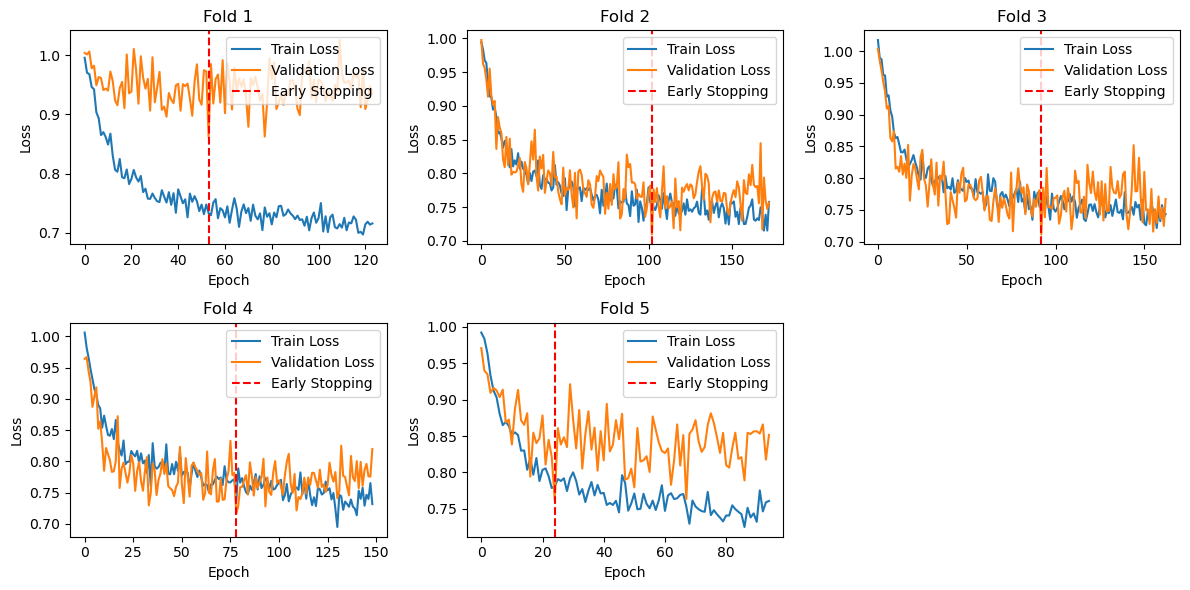

In [ ]:
# print all losses for each fold on different subplots
plt.figure(figsize=(12, 6))
for i in range(N_FOLDS):
    plt.subplot(2, 3, i + 1)
    plt.plot(all_train_losses[i], label='Train Loss')
    plt.plot(all_val_losses[i], label='Validation Loss')
    plt.axvline(all_last_indexes[i], color='r', linestyle='--', label='Early Stopping')
    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Testing

In [ ]:
tennis_test_dataset = TennisMatchDataset([
                                            'past-stuttgart-atp-singles',
                                            'past-hertogenbosch-atp-singles',
                                          ])
nb_errors = 0
list_vectors_test = []
list_labels_test = []
list_matches_ids_test = []

list_vectors_test, list_labels_test, list_matches_ids_test, nb_errors = tennis_test_dataset.get_past_vectors()


print(f'Number of errors : {nb_errors} over {len(tennis_test_dataset.get_matches_ids())} matches')

print(f'Number of vectors : {len(list_vectors_test)}')
input_shapes = []
for i in range(len(list_vectors_test[0])):
    input_shapes.append(len(list_vectors_test[0][i]))
print(f'Input shapes : {input_shapes}')

# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors
new_list_vectors_test = []
new_list_labels_test = []
new_list_matches_ids_test = []

for i in tqdm(range(len(list_vectors_test))) :
    vector = list_vectors_test[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels_test[i] != c.PADDING:
        new_list_vectors_test.append(vector)
        new_list_labels_test.append(list_labels_test[i])
        new_list_matches_ids_test.append(list_matches_ids_test[i])
print(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors_test)}')

tournament_features_vector_test = []
player1_features_vector_test = []
player2_features_vector_test = []
h2h_overall_vector_test = []
h2h_surface_vector_test = []
shape_overall_player1_vector_test = []
shape_overall_player2_vector_test = []

for vector in new_list_vectors_test:
    tournament_features_vector_test.append(vector[0])
    player1_features_vector_test.append(vector[1])
    player2_features_vector_test.append(vector[2])
    h2h_overall_vector_test.append(vector[3])
    h2h_surface_vector_test.append(vector[4])
    shape_overall_player1_vector_test.append(vector[5])
    shape_overall_player2_vector_test.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor_test = torch.tensor(tournament_features_vector_test, dtype=torch.float)
tournament_features_mask_test = torch.zeros_like(tournament_features_tensor_test)
tournament_features_mask_test[tournament_features_tensor_test != c.PADDING] = 1.
player1_features_tensor_test = torch.tensor(player1_features_vector_test, dtype=torch.float)
player1_features_mask_test = torch.zeros_like(player1_features_tensor_test)
player1_features_mask_test[player1_features_tensor_test != c.PADDING] = 1.
player2_features_tensor_test = torch.tensor(player2_features_vector_test, dtype=torch.float)
player2_features_mask_test = torch.zeros_like(player2_features_tensor_test)
player2_features_mask_test[player2_features_tensor_test != c.PADDING] = 1.
h2h_overall_tensor_test = torch.tensor(h2h_overall_vector_test, dtype=torch.float)
h2h_overall_mask_test = torch.zeros_like(h2h_overall_tensor_test)
h2h_overall_mask_test[h2h_overall_tensor_test != c.PADDING] = 1.
h2h_surface_tensor_test = torch.tensor(h2h_surface_vector_test, dtype=torch.float)
h2h_surface_mask_test = torch.zeros_like(h2h_surface_tensor_test)
h2h_surface_mask_test[h2h_surface_tensor_test != c.PADDING] = 1.
shape_overall_player1_tensor_test = torch.tensor(shape_overall_player1_vector_test, dtype=torch.float)
shape_overall_player1_mask_test = torch.zeros_like(shape_overall_player1_tensor_test)
shape_overall_player1_mask_test[shape_overall_player1_tensor_test != c.PADDING] = 1.
shape_overall_player2_tensor_test = torch.tensor(shape_overall_player2_vector_test, dtype=torch.float)
shape_overall_player2_mask_test = torch.zeros_like(shape_overall_player2_tensor_test)
shape_overall_player2_mask_test[shape_overall_player2_tensor_test != c.PADDING] = 1.

label_vector = []
for label in new_list_labels_test:
    label_vector.append(label)

label_tensor_test = torch.tensor(label_vector)

test_dataset = TensorDataset(tournament_features_tensor_test, 
                             tournament_features_mask_test, 
                             player1_features_tensor_test, 
                             player1_features_mask_test, 
                             player2_features_tensor_test, 
                             player2_features_mask_test,
                             h2h_overall_tensor_test, 
                             h2h_overall_mask_test, 
                             h2h_surface_tensor_test, 
                             h2h_surface_mask_test, 
                             shape_overall_player1_tensor_test, 
                             shape_overall_player1_mask_test, 
                             shape_overall_player2_tensor_test, 
                             shape_overall_player2_mask_test, 
                             label_tensor_test)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

all_predictions = []
for j in range(N_FOLDS):
    model = TennisMatchPredictor(input_shapes)
    model.load_state_dict(torch.load(f'{c2.REPO_PATH}/tennis/models/best_model_fold_{j + 1}.pth'))
    model.eval()
    predictions = []
    with torch.no_grad():
        test_loss = 0.0
        for i, data in enumerate(test_dataloader):
            tournament_features, tournament_mask, player1_features, player1_mask, player2_features, player2_mask, h2h_overall, h2h_overall_mask, h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, shape_overall_player2, shape_overall_player2_mask, labels = data
            outputs = model(tournament_features = tournament_features, 
                            player1_features = player1_features, 
                            player2_features = player2_features, 
                            h2h_overall = h2h_overall, 
                            h2h_surface = h2h_surface, 
                            shape_overall_player1 = shape_overall_player1, 
                            shape_overall_player2 = shape_overall_player2,
                            tournament_mask = tournament_mask, 
                            player1_mask = player1_mask, 
                            player2_mask = player2_mask, 
                            h2h_overall_mask = h2h_overall_mask,
                            h2h_surface_mask = h2h_surface_mask,
                            shape_overall_player1_mask = shape_overall_player1_mask,
                            shape_overall_player2_mask = shape_overall_player2_mask
                            )    
            predictions.append(outputs)        
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
        print(f'Test Loss: for {j+1} : {test_loss/len(test_dataloader):.2f}')
    # find the matches where the model is the most confident and was right
    predictions = torch.cat(predictions).flatten()
    all_predictions.append(predictions)

all_predictions = torch.stack(all_predictions)
predictions = all_predictions.mean(dim=0)

# get the indexes of the matches where the model was right
# create data frame with the predictions and the labels and the match ids
df = pd.DataFrame(columns=['match_id', 'predictions', 'labels'])
df['predictions'] = predictions
df['labels'] = label_tensor_test
df['match_id'] = new_list_matches_ids_test
# order the data frame by predictions values
df = df.sort_values(by='predictions', ascending=False)

# fetch the odds of betclic for the matches
odds_1_list = []
odds_2_list = []
prob_list = []
for match_id in df['match_id']:
    match_odds =tennis_test_dataset.get_match(match_id).get_odds()
    odds_found = False
    for match_odd in match_odds:
        if match_odd['bookmaker'] == 'Betclic.fr':
            odds_found = True
            odds_1_list.append(float(match_odd['odds'][0]))
            odds_2_list.append(float(match_odd['odds'][1]))
            player1odd = float(match_odd['odds'][0])
            player2odd = float(match_odd['odds'][1])
            prob_win_player1 = 1/player1odd
            prob_win_player2 = 1/player2odd
            # normalize the probabilities
            prob_sum = prob_win_player1 + prob_win_player2
            prob_win_player1 = prob_win_player1/prob_sum
            prob_win_player2 = prob_win_player2/prob_sum
            prob_list.append(2*prob_win_player1-1)
            break
    if not odds_found:
        odds_1_list.append(None)
        odds_2_list.append(None)
        prob_list.append(None) 

df['odds_1'] = odds_1_list
df['odds_2'] = odds_2_list
df['bookmaker_pred'] = prob_list
df = df.loc[df['odds_1'].notnull()]

Loading data for tournaments {'past-stuttgart-atp-singles', 'past-hertogenbosch-atp-singles'} ...
... loaded 78 matches
Updating id table ...
... id table updated


  0%|          | 0/2 [00:00<?, ?it/s]

Error 'n0dd' for match reW1aBTi in tournament past-stuttgart-atp-singles
Error 'g0gz' for match Q14yykQa in tournament past-stuttgart-atp-singles
Error 'g0a0' for match Oh6c4ESH in tournament past-hertogenbosch-atp-singles


100%|██████████| 2/2 [00:00<00:00, 47.86it/s]

Error 'g0a0' for match WYuCTZFk in tournament past-hertogenbosch-atp-singles
Error 'c0jt' for match Am1pF1lS in tournament past-hertogenbosch-atp-singles
Error 'h0eq' for match hEehX6PO in tournament past-hertogenbosch-atp-singles
Error 'g0a0' for match IJwypHBE in tournament past-hertogenbosch-atp-singles
Number of errors : 7 over 78 matches
Number of vectors : 71
Input shapes : [2, 40, 40, 4, 4, 15, 15]


  0%|          | 0/71 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 47
Test Loss: for 1 : 1.10
Test Loss: for 2 : 1.15
Test Loss: for 3 : 1.00
Test Loss: for 4 : 1.02
Test Loss: for 5 : 1.12


## Betting

In [ ]:
# Strategy results : bet the proportion given by the kelly criterion on each match
INIT_AMOUNT = 100 # euros
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
# bet on player 1


# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - (1- prob)/(odds))*safe

test = df.copy()
test['prob_player1'] = (1+test['predictions'])/2
test['prob_player2'] = (1-test['predictions'])/2
# apply keely criterion
test['kelly_criterion_player1'] = test.apply(lambda row : kelly_criterion(row['odds_1'], row['prob_player1']), axis=1)
test['kelly_criterion_player2'] = test.apply(lambda row : kelly_criterion(row['odds_2'], row['prob_player2']), axis=1)


amount = INIT_AMOUNT
# try the model 
for i, row in test.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    if row['kelly_criterion_player1'] > 0 :
        # betting on player 1
        bet = amount * row['kelly_criterion_player1']
        # win or lose
        if row['labels'] == 1:
            amount += bet * row['odds_1']
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred = {row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred ={row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")

    if row['kelly_criterion_player2'] > 0 :
        # betting on player 2
        bet = amount * row['kelly_criterion_player2']
        # win or lose
        if row['labels'] == -1:
            amount += bet * row['odds_2']
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")

print(f"\nTotal amount after betting : {amount:.2f}")
if amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-amount)/INIT_AMOUNT*100:.2f}%{RESET}")

Match : COBghUGb De Minaur A. - Bergs Z., bet on player 1 (model pred = 0.91), amount to bet : 8.28, odds : 1.12, label : 1.00, total amount : 109.27
Match : j5cd4pTq Humbert U. - Brouwer G., bet on player 1 (model pred = 0.90), amount to bet : 9.02, odds : 1.29, label : 1.00, total amount : 120.90
Match : b3tmyMSO Humbert U. - Fils A., bet on player 1 (model pred = 0.89), amount to bet : 10.02, odds : 1.59, label : 1.00, total amount : 136.83
Match : nctXlgGr De Minaur A. - Raonic M., bet on player 1 (model pred = 0.86), amount to bet : 10.34, odds : 1.31, label : 1.00, total amount : 150.38
Match : KhLLHALr Griekspoor T. - Vukic A., bet on player 1 (model pred = 0.85), amount to bet : 10.93, odds : 1.30, label : 1.00, total amount : 164.59
Match : Y7imSV5e Griekspoor T. - Kecmanovic M., bet on player 1 (model pred = 0.83), amount to bet : 11.59, odds : 1.33, label : 1.00, total amount : 180.01
Match : On3pYZan Berrettini M. - Duckworth J., bet on player 1 (model pred = 0.82), amount 

## Autre

In [ ]:
CONFIDENCE_THRESHLOLD = 0.4

bet_on_player_1_df = df.loc[df['predictions'] > CONFIDENCE_THRESHLOLD].copy()
bet_on_player_1_df['prediction_prob']= bet_on_player_1_df['predictions'].apply(lambda x : (1+x)/2)
bet_on_player_1_df['kelly_criterion'] = bet_on_player_1_df.apply(lambda row : kelly_criterion(row['odds_1'], row['prediction_prob']), axis=1)
bet_on_player_2_df = df.loc[df['predictions'] < -CONFIDENCE_THRESHLOLD].copy()
bet_on_player_2_df['prediction_prob']= bet_on_player_2_df['predictions'].apply(lambda x : (1-x)/2)
bet_on_player_2_df['kelly_criterion'] = bet_on_player_2_df.apply(lambda row : kelly_criterion(row['odds_2'], row['prediction_prob']), axis=1)
bet_on_player_2_df = bet_on_player_2_df.sort_values(by='predictions', ascending=True)

total_amount = INIT_AMOUNT
for i, row in bet_on_player_1_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == 1:
        total_amount += amout_to_bet*(row['odds_1']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    

# bet on player 2
for i, row in bet_on_player_2_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == -1:
        total_amount += amout_to_bet*(row['odds_2']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")



print(f"\nTotal amount after betting : {total_amount:.2f}")
if total_amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(total_amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-total_amount)/INIT_AMOUNT*100:.2f}%{RESET}")

Match : COBghUGb De Minaur A. - Bergs Z., bet on player 1 (0.91), amount to bet : 8.28, odds : 1.12, label : 1.00, total amount : 100.99
Match : j5cd4pTq Humbert U. - Brouwer G., bet on player 1 (0.90), amount to bet : 8.34, odds : 1.29, label : 1.00, total amount : 103.41
Match : b3tmyMSO Humbert U. - Fils A., bet on player 1 (0.89), amount to bet : 8.57, odds : 1.59, label : 1.00, total amount : 108.47
Match : nctXlgGr De Minaur A. - Raonic M., bet on player 1 (0.86), amount to bet : 8.19, odds : 1.31, label : 1.00, total amount : 111.01
Match : KhLLHALr Griekspoor T. - Vukic A., bet on player 1 (0.85), amount to bet : 8.07, odds : 1.30, label : 1.00, total amount : 113.43
Match : Y7imSV5e Griekspoor T. - Kecmanovic M., bet on player 1 (0.83), amount to bet : 7.99, odds : 1.33, label : 1.00, total amount : 116.06
Match : On3pYZan Berrettini M. - Duckworth J., bet on player 1 (0.82), amount to bet : 7.73, odds : 1.17, label : 1.00, total amount : 117.38
Match : jFSyuXyH Griekspoor T. 